In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("./DataSet_FBK/StChiara.csv")
df.ts = pd.to_datetime(df.ts)

change = {}
for i in range(1,9):
    change[f"S{str(i)}_R1"] = f"T{str(i)}"
    change[f"S{str(i)}_R2"] = f"R{str(i)}"
    change[f"S{str(i)}_Voltage"] = f"V{str(i)}"

df = df.rename(columns=change)
# df.ts = df.ts.apply(lambda x: x.replace(tzinfo=None))



df = df.set_index("ts")
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
# DA 0----18
# Entrambe Le Colonne
# df_parziale = df["01/13/2021": "04/29/2021"][["R1","R2"]]




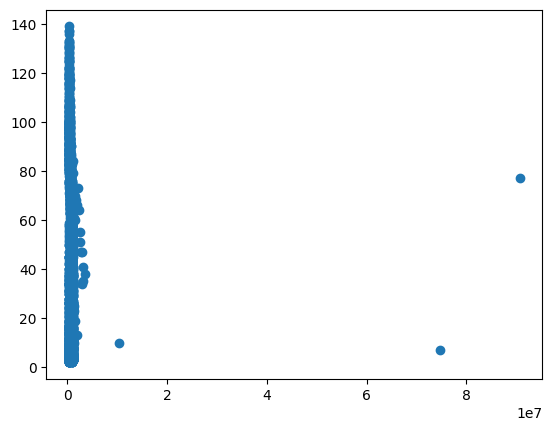

In [7]:
import datetime
df_APPA = pd.read_csv("./DataSet_APPA/APPA1.csv", sep = ",",header = 0)

df_APPA.Time = pd.to_datetime(df_APPA.Time)

timezone_offset = datetime.timedelta(hours=2)
timezone = datetime.timezone(timezone_offset)

df_APPA.Time = df_APPA.Time.apply(lambda x: x.replace(tzinfo=timezone))

df_APPA.rename(columns = {"Time":"ts"}, inplace = True)

df_media = df.resample("1H").mean().reset_index().merge(df_APPA)
df_media.set_index("ts", inplace=True)
df_parziale_parco = df_media["01/13/2021":"4/29/2021"][["R3","Ozono"]]

# ---------------- Creazione Plot ---   ---------------------

plt.scatter(df_parziale_parco.R3, df_parziale_parco.Ozono)
plt.show()